In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from CityStreet import CityStreet

In [2]:
import torchvision.transforms as transforms
import torch

transform = transforms.Compose([
    transforms.Resize(512),
    transforms.CenterCrop(512),
])

target_transform = transforms.Compose([
    transforms.Resize(512, interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.Lambda(lambda x: torch.where(x > 0, 1.0, 0.0)),
    transforms.GaussianBlur(33, (7, 7)),
    transforms.CenterCrop(512),
])

target_transform_nb = transforms.Compose([
    transforms.Resize(512, interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.Lambda(lambda x: torch.where(x > 0, 1.0, 0.0)),
    transforms.CenterCrop(512),
])

dataset = CityStreet("C:\\Users\\Viyerelu\\Downloads\\CityStreet", view=3, transform=transform, target_transform=target_transform)
dataset_nb = CityStreet("C:\\Users\\Viyerelu\\Downloads\\CityStreet", view=3, transform=transform, target_transform=target_transform_nb)

idx = 10
img, hmap = dataset[idx]


In [3]:
hmap.sum(), dataset_nb[idx][1].sum()

(tensor(29.), tensor(29.))

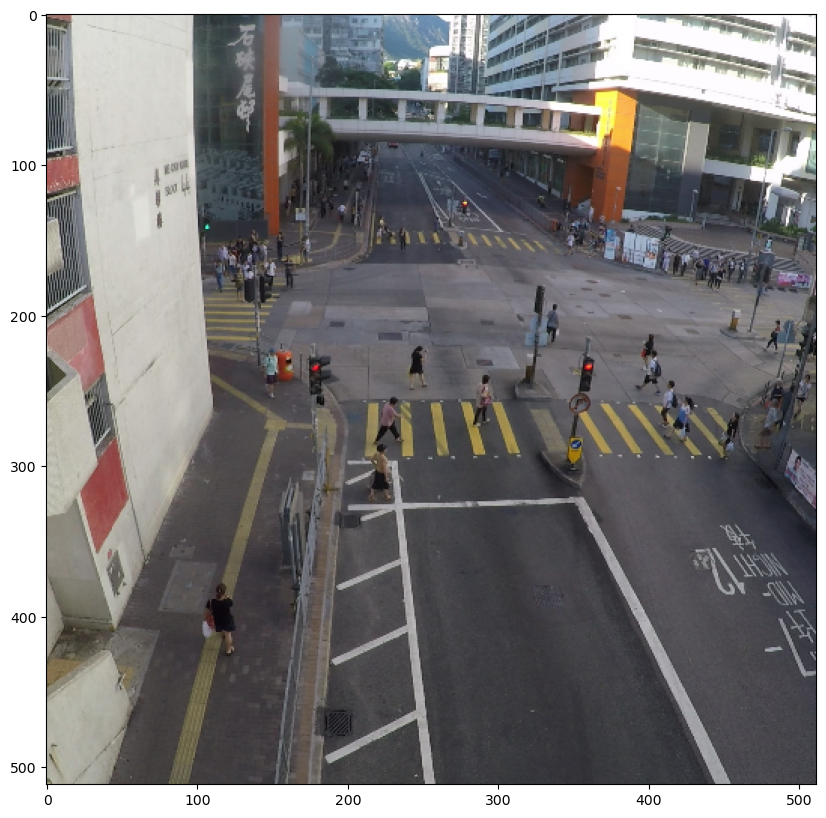

In [4]:
plt.figure(figsize=(10, 10))
plt.imshow(img.permute(1, 2, 0))


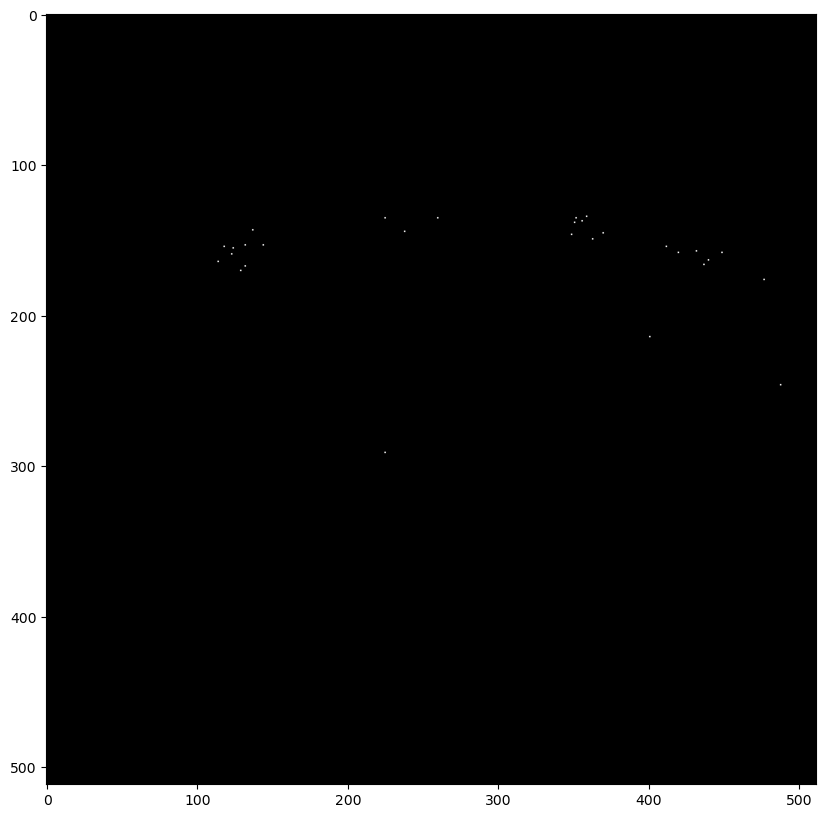

In [5]:
plt.figure(figsize=(10, 10))

plt.imshow((dataset_nb[idx][1]).permute(1, 2, 0), cmap="gray")

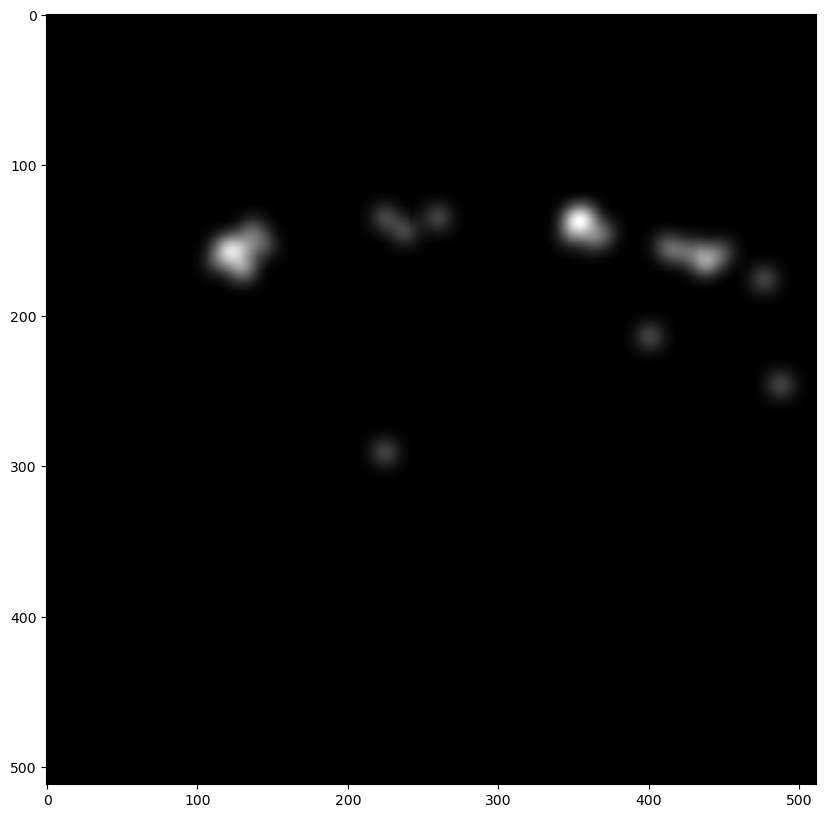

In [6]:
plt.figure(figsize=(10, 10))

plt.imshow((hmap).permute(1, 2, 0), cmap="gray")

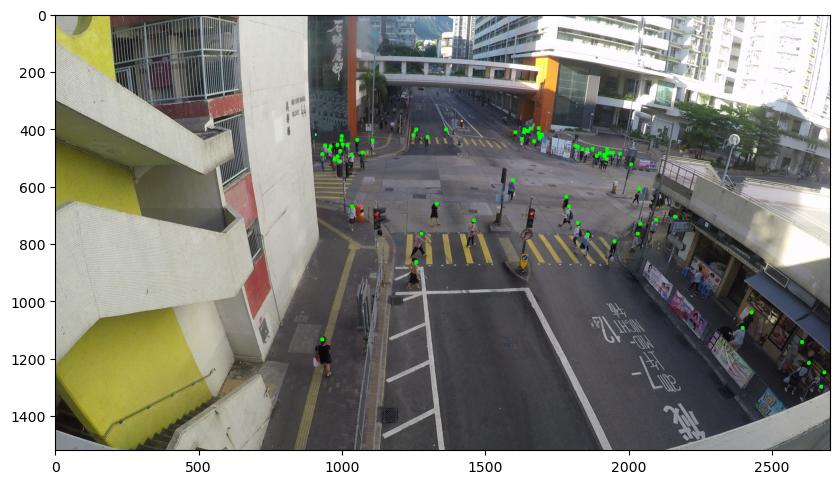

In [7]:
image, pts = dataset.get_original(idx)
img_numpy = image.permute(1, 2, 0).numpy().astype(np.uint8)

for pt in pts:
    cv2.circle(img_numpy, pt, 2, (0, 255, 0), 10)

plt.figure(figsize=(10, 10))
plt.imshow(img_numpy)